### Importação dos dados



In [32]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [33]:
print(loja.columns)  # Nome das colunas

Index(['Produto', 'Categoria do Produto', 'Preço', 'Frete', 'Data da Compra',
       'Vendedor', 'Local da compra', 'Avaliação da compra',
       'Tipo de pagamento', 'Quantidade de parcelas', 'lat', 'lon'],
      dtype='object')


In [34]:
faturamento_loja1 = loja['Preço'].sum()
faturamento_loja2 = loja2['Preço'].sum()
faturamento_loja3 = loja3['Preço'].sum()
faturamento_loja4 = loja4['Preço'].sum()

print(f"Faturamento Loja 1: R${faturamento_loja1:,.2f}")
print(f"Faturamento Loja 2: R${faturamento_loja2:,.2f}")
print(f"Faturamento Loja 3: R${faturamento_loja3:,.2f}")
print(f"Faturamento Loja 4: R${faturamento_loja4:,.2f}")

Faturamento Loja 1: R$1,534,509.12
Faturamento Loja 2: R$1,488,459.06
Faturamento Loja 3: R$1,464,025.03
Faturamento Loja 4: R$1,384,497.58


In [35]:
import pandas as pd

# Carregar os dados
urls = [
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"
]

lojas = [pd.read_csv(url) for url in urls]

# Calculo faturamento
for i, df in enumerate(lojas, start=1):
    faturamento = df['Preço'].sum()
    print(f"Faturamento Loja {i}: R${faturamento:,.2f}")

    resumo = pd.DataFrame({
    'Loja': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    'Faturamento': [df['Preço'].sum() for df in lojas]
})
print(resumo)

Faturamento Loja 1: R$1,534,509.12
Faturamento Loja 2: R$1,488,459.06
Faturamento Loja 3: R$1,464,025.03
Faturamento Loja 4: R$1,384,497.58
     Loja  Faturamento
0  Loja 1   1534509.12
1  Loja 2   1488459.06
2  Loja 3   1464025.03
3  Loja 4   1384497.58


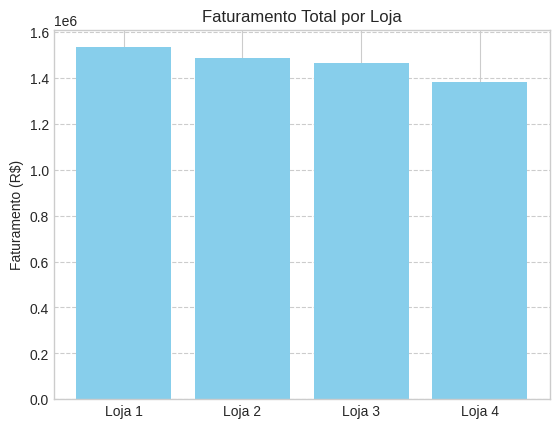

In [36]:
import matplotlib.pyplot as plt

# Dados
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
faturamentos = [faturamento_loja1, faturamento_loja2, faturamento_loja3, faturamento_loja4]

# Gráfico
plt.bar(lojas, faturamentos, color='skyblue')
plt.title('Faturamento Total por Loja')
plt.ylabel('Faturamento (R$)')
plt.grid(axis='y', linestyle='--')
plt.show()

# 2. Vendas por Categoria


In [37]:
lojas = [pd.read_csv(url) for url in urls]

# Verificar o nome da coluna de categoria
print(lojas[0].columns)

Index(['Produto', 'Categoria do Produto', 'Preço', 'Frete', 'Data da Compra',
       'Vendedor', 'Local da compra', 'Avaliação da compra',
       'Tipo de pagamento', 'Quantidade de parcelas', 'lat', 'lon'],
      dtype='object')


In [38]:
for i, loja in enumerate(lojas, start=1):
    vendas_por_categoria = loja['Categoria do Produto'].value_counts().reset_index()
    vendas_por_categoria.columns = ['Categoria', 'Quantidade_Vendida']

    print(f"\n🔹 Loja {i} - Vendas por Categoria:")
    print(vendas_por_categoria)


🔹 Loja 1 - Vendas por Categoria:
               Categoria  Quantidade_Vendida
0                 moveis                 465
1            eletronicos                 448
2             brinquedos                 324
3       eletrodomesticos                 312
4        esporte e lazer                 284
5  instrumentos musicais                 182
6                 livros                 173
7  utilidades domesticas                 171

🔹 Loja 2 - Vendas por Categoria:
               Categoria  Quantidade_Vendida
0                 moveis                 442
1            eletronicos                 422
2             brinquedos                 313
3       eletrodomesticos                 305
4        esporte e lazer                 275
5  instrumentos musicais                 224
6                 livros                 197
7  utilidades domesticas                 181

🔹 Loja 3 - Vendas por Categoria:
               Categoria  Quantidade_Vendida
0                 moveis                 49

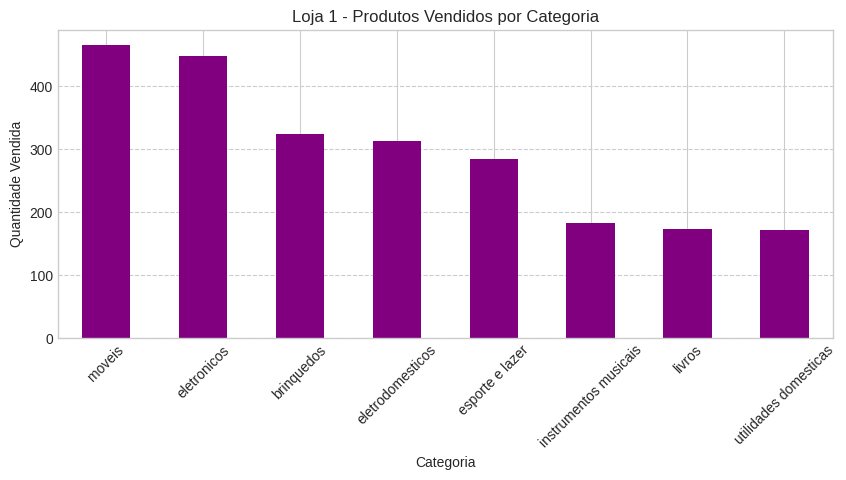

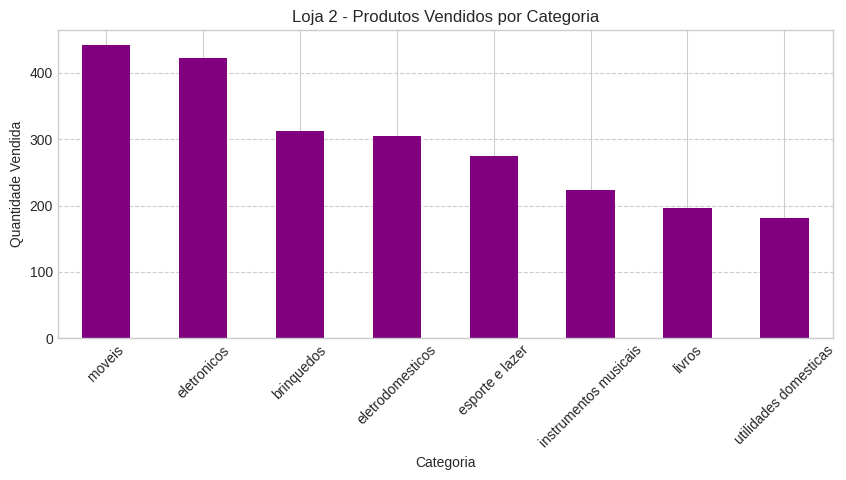

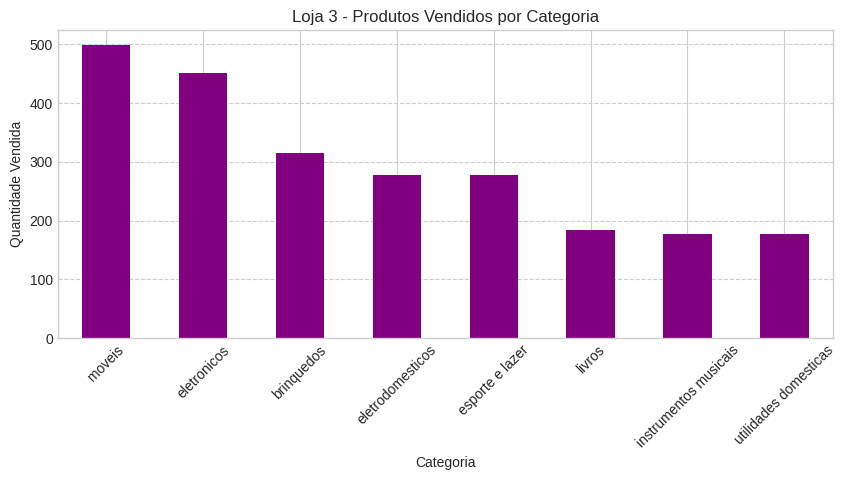

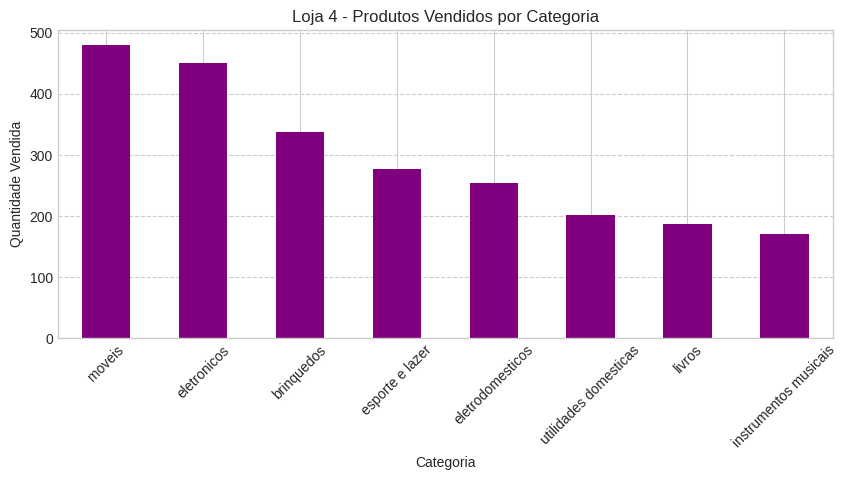

In [39]:
import matplotlib.pyplot as plt

for i, loja in enumerate(lojas, start=1):
    vendas_por_categoria = loja['Categoria do Produto'].value_counts()

    plt.figure(figsize=(10, 4))
    vendas_por_categoria.plot(kind='bar', color='purple')
    plt.title(f'Loja {i} - Produtos Vendidos por Categoria')
    plt.xlabel('Categoria')
    plt.ylabel('Quantidade Vendida')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--')
    plt.show()

# 3. Média de Avaliação das Lojas

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Nome da coluna de avaliações (exemplo: 'Avaliacao', 'Nota', 'Rating')
print("Colunas disponíveis na Loja 1:", lojas[0].columns.tolist())

Colunas disponíveis na Loja 1: ['Produto', 'Categoria do Produto', 'Preço', 'Frete', 'Data da Compra', 'Vendedor', 'Local da compra', 'Avaliação da compra', 'Tipo de pagamento', 'Quantidade de parcelas', 'lat', 'lon']


Colunas disponíveis na Loja 1: ['Produto', 'Categoria do Produto', 'Preço', 'Frete', 'Data da Compra', 'Vendedor', 'Local da compra', 'Avaliação da compra', 'Tipo de pagamento', 'Quantidade de parcelas', 'lat', 'lon']
⭐ Loja 1 - Média de avaliações: 3.98
⭐ Loja 2 - Média de avaliações: 4.04
⭐ Loja 3 - Média de avaliações: 4.05
⭐ Loja 4 - Média de avaliações: 4.00


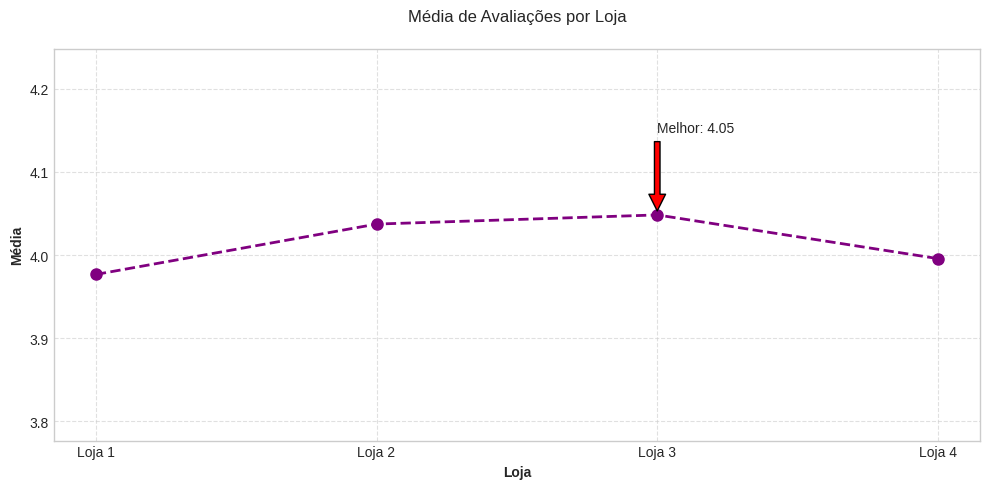

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Nome da coluna de avaliações
print("Colunas disponíveis na Loja 1:", lojas[0].columns.tolist())

# 2. Média das avaliações por loja
coluna_avaliacao = 'Avaliação da compra'
medias = []
nomes_lojas = []

for i, loja in enumerate(lojas, start=1):
    if coluna_avaliacao in loja.columns:
        media = loja[coluna_avaliacao].mean()
        medias.append(media)
        nomes_lojas.append(f"Loja {i}")
        print(f"⭐ Loja {i} - Média de avaliações: {media:.2f}")
    else:
        print(f"⚠️ Loja {i} não possui a coluna '{coluna_avaliacao}'")

# 3. Gráfico de linhas
if medias:
    plt.figure(figsize=(10, 5))
    plt.plot(nomes_lojas, medias, marker='o', markersize=8,
             linestyle='--', color='purple', linewidth=2)

    # Destaque da melhor loja
    best_idx = medias.index(max(medias))
    plt.annotate(f'Melhor: {medias[best_idx]:.2f}',
                 xy=(best_idx, medias[best_idx]),
                 xytext=(best_idx, medias[best_idx] + 0.1),
                 arrowprops=dict(facecolor='red', shrink=0.05))

    plt.title('Média de Avaliações por Loja', pad=20)
    plt.xlabel('Loja', fontweight='bold')
    plt.ylabel('Média', fontweight='bold')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.ylim(min(medias) - 0.2, max(medias) + 0.2)
    plt.tight_layout()
    plt.show()
else:
    print("\n🔍 Nenhum dado de avaliação encontrado para gerar o gráfico.")

# 4. Produtos Mais e Menos Vendidos

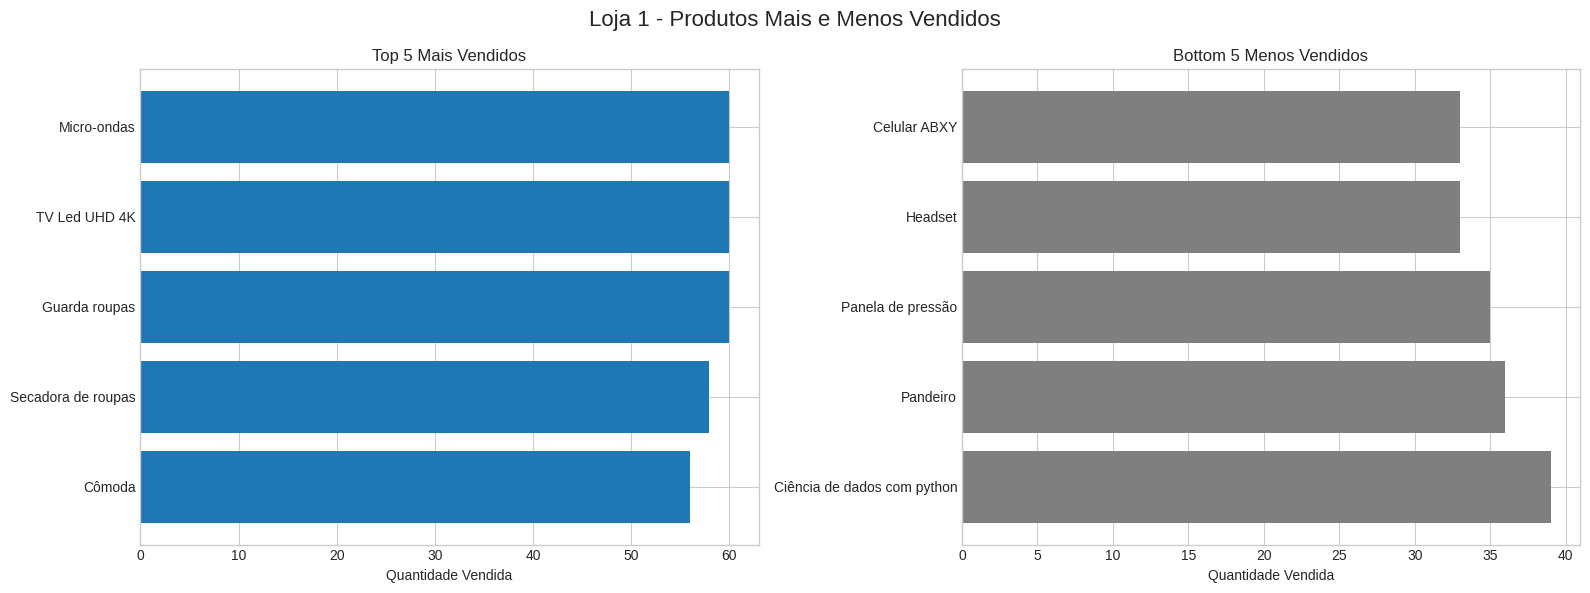


📊 Loja 1 - Resumo de Vendas:
👉 Top 5 Produtos:
           Produto  Quantidade
       Micro-ondas          60
     TV Led UHD 4K          60
     Guarda roupas          60
Secadora de roupas          58
            Cômoda          56

👎 Bottom 5 Produtos:
                    Produto  Quantidade
Ciência de dados com python          39
                   Pandeiro          36
          Panela de pressão          35
                    Headset          33
               Celular ABXY          33




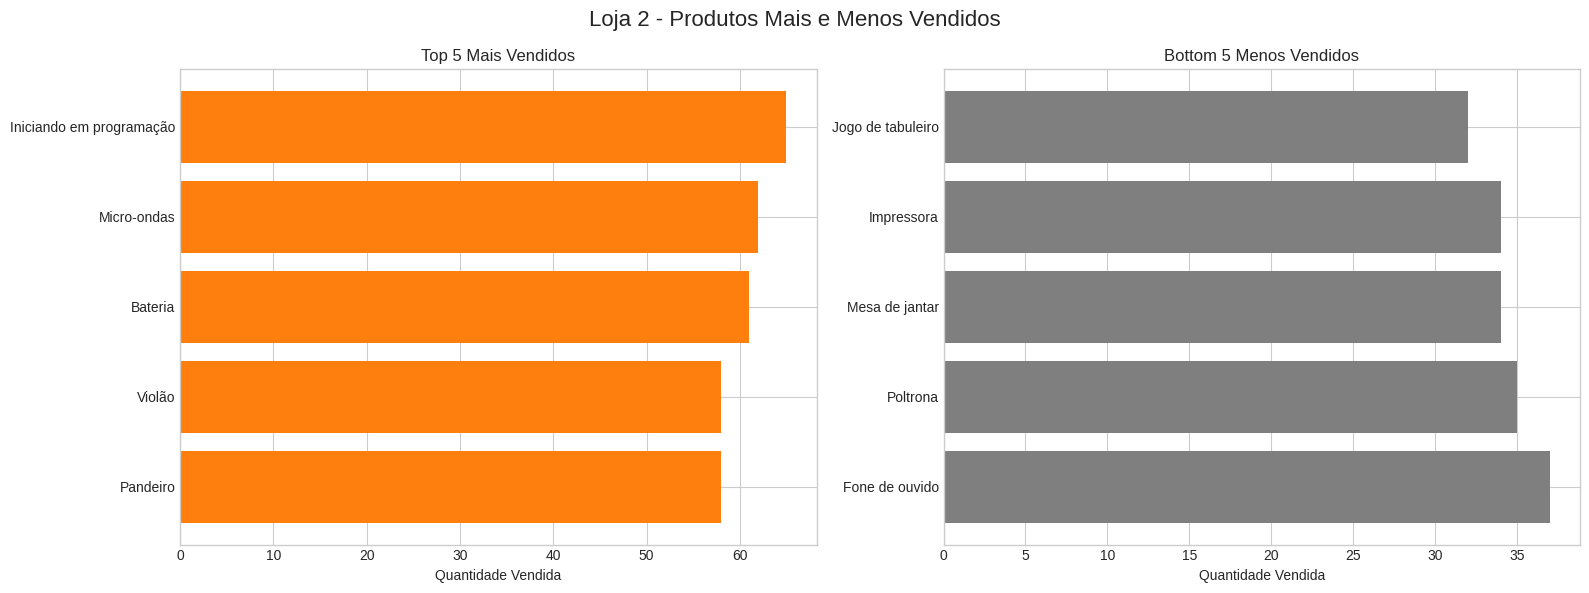


📊 Loja 2 - Resumo de Vendas:
👉 Top 5 Produtos:
                 Produto  Quantidade
Iniciando em programação          65
             Micro-ondas          62
                 Bateria          61
                  Violão          58
                Pandeiro          58

👎 Bottom 5 Produtos:
          Produto  Quantidade
   Fone de ouvido          37
         Poltrona          35
   Mesa de jantar          34
       Impressora          34
Jogo de tabuleiro          32




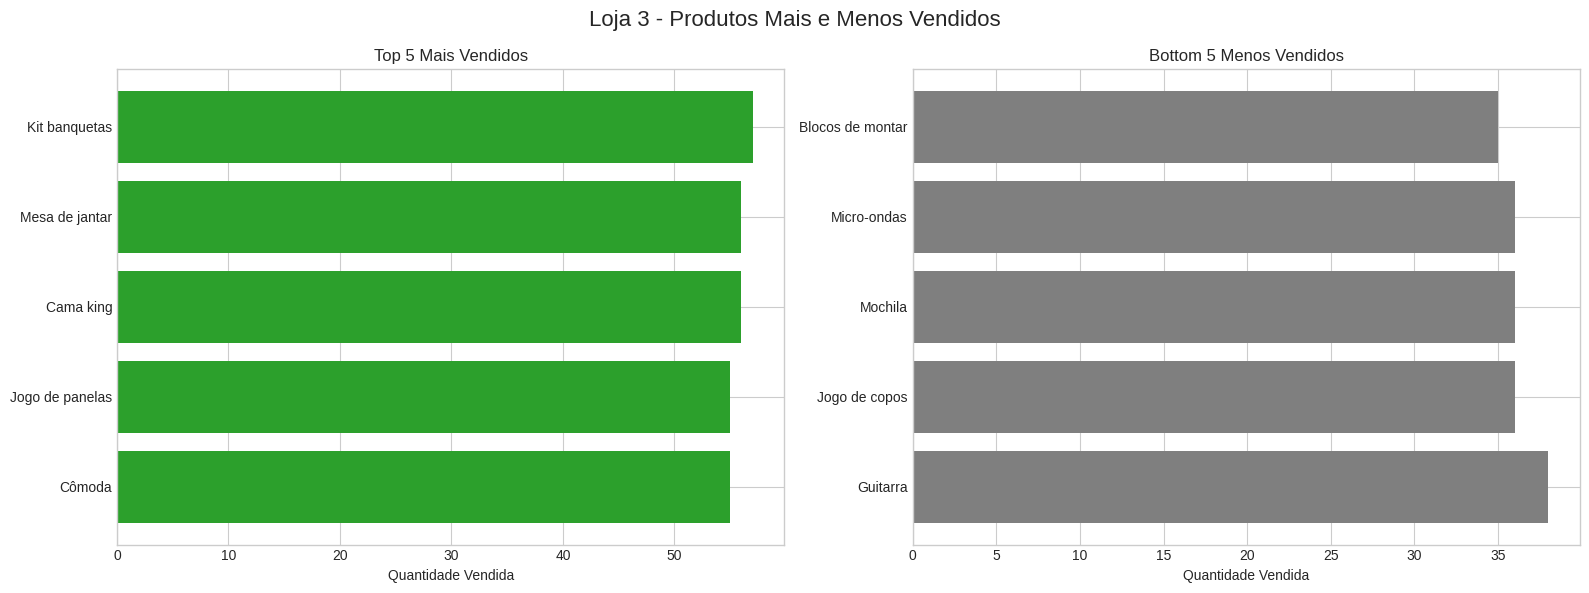


📊 Loja 3 - Resumo de Vendas:
👉 Top 5 Produtos:
        Produto  Quantidade
  Kit banquetas          57
 Mesa de jantar          56
      Cama king          56
Jogo de panelas          55
         Cômoda          55

👎 Bottom 5 Produtos:
         Produto  Quantidade
        Guitarra          38
   Jogo de copos          36
         Mochila          36
     Micro-ondas          36
Blocos de montar          35




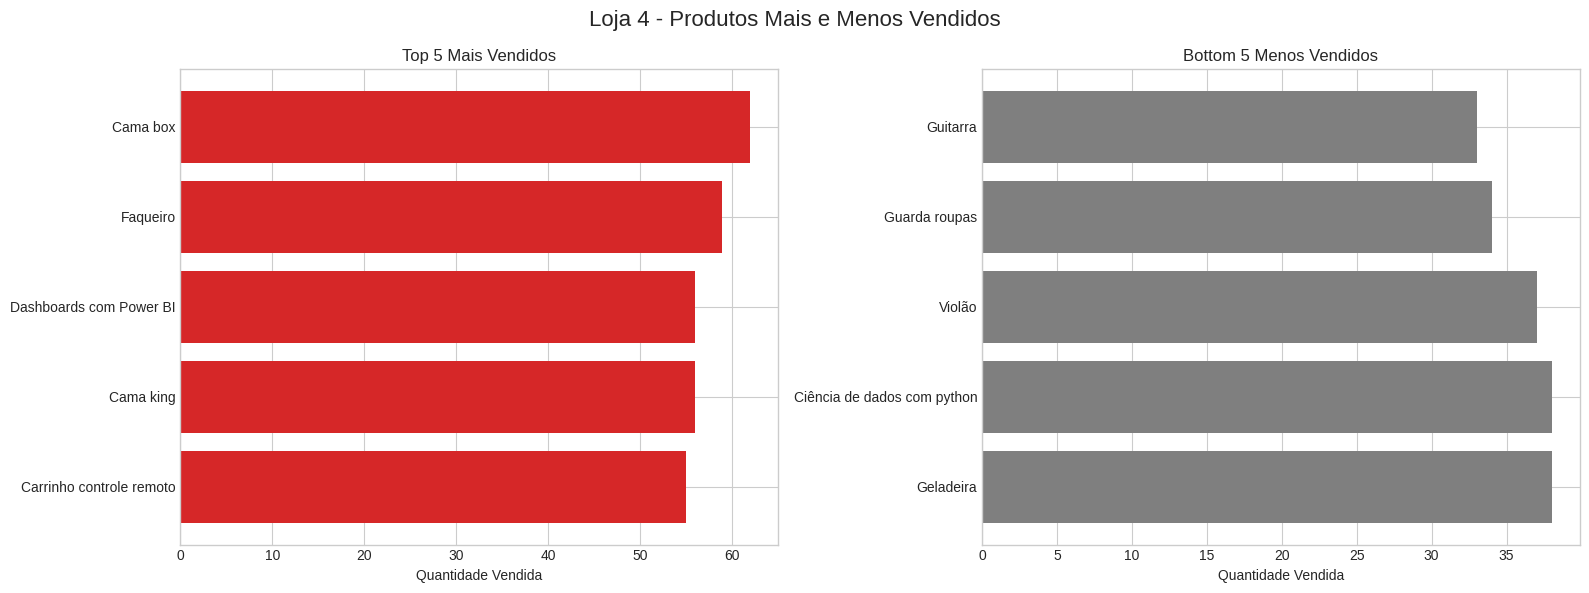


📊 Loja 4 - Resumo de Vendas:
👉 Top 5 Produtos:
                 Produto  Quantidade
                Cama box          62
                Faqueiro          59
 Dashboards com Power BI          56
               Cama king          56
Carrinho controle remoto          55

👎 Bottom 5 Produtos:
                    Produto  Quantidade
                  Geladeira          38
Ciência de dados com python          38
                     Violão          37
              Guarda roupas          34
                   Guitarra          33



🔍 Comparativo Entre Lojas:
🏆 Top 3 Produtos por Loja:
  Loja                  Produto  Quantidade
Loja 2 Iniciando em programação          65
Loja 2              Micro-ondas          62
Loja 4                 Cama box          62
Loja 2                  Bateria          61
Loja 1            Guarda roupas          60
Loja 1              Micro-ondas          60
Loja 1            TV Led UHD 4K          60
Loja 4                 Faqueiro          59
Loja 3         

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # Import the seaborn library

# Configuração de estilo
# Now that seaborn is imported, the 'seaborn' style should be available
plt.style.use('seaborn-v0_8-whitegrid') # Using a specific seaborn style that is known to be available. You can try 'seaborn' if you prefer a different look.
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# 1. Análise por Loja
for i, loja in enumerate(lojas, start=1):
    # Verifica se a tabela possui a coluna 'Produto'
    if 'Produto' not in loja.columns:
        print(f"⚠️ Loja {i} não possui a coluna 'Produto'")
        continue

    # Conta a quantidade de cada Produto
    vendas_por_produto = loja['Produto'].value_counts().reset_index()
    vendas_por_produto.columns = ['Produto', 'Quantidade']

    # Ordena do maior para o menor
    vendas_por_produto = vendas_por_produto.sort_values(by='Quantidade', ascending=False)

    # Top 5 mais vendidos
    top5 = vendas_por_produto.head(5)
    # Bottom 5 menos vendidos
    bottom5 = vendas_por_produto.tail(5)

    # Gráfico duplo
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    fig.suptitle(f'Loja {i} - Produtos Mais e Menos Vendidos', fontsize=16)

    # Gráfico dos mais vendidos
    ax1.barh(top5['Produto'], top5['Quantidade'], color=colors[i-1 % len(colors)])
    ax1.set_title('Top 5 Mais Vendidos')
    ax1.set_xlabel('Quantidade Vendida')
    ax1.invert_yaxis()

    # Gráfico dos menos vendidos
    ax2.barh(bottom5['Produto'], bottom5['Quantidade'], color='#7f7f7f')
    ax2.set_title('Bottom 5 Menos Vendidos')
    ax2.set_xlabel('Quantidade Vendida')

    plt.tight_layout()
    plt.show()

    # Exibe tabelas
    print(f"\n📊 Loja {i} - Resumo de Vendas:")
    print("👉 Top 5 Produtos:")
    print(top5.to_string(index=False))
    print("\n👎 Bottom 5 Produtos:")
    print(bottom5.to_string(index=False))
    print("\n" + "="*60 + "\n")

# 2. Análise Consolidada (opcional)
if len(lojas) > 1:
    print("\n🔍 Comparativo Entre Lojas:")
    todos_produtos = pd.concat([df.assign(Loja=f'Loja {i+1}')
                                for i, df in enumerate(lojas)])

    # Top 3 de cada loja
    top_por_loja = todos_produtos.groupby(['Loja', 'Produto']).size().reset_index(name='Quantidade')
    top_por_loja = top_por_loja.sort_values(by='Quantidade', ascending=False)
    top_por_loja = top_por_loja.groupby('Loja').head(3)

    print("🏆 Top 3 Produtos por Loja:")
    print(top_por_loja.to_string(index=False))


# 5. Frete Médio por Loja


Colunas disponíveis na Loja 1: ['Produto', 'Categoria do Produto', 'Preço', 'Frete', 'Data da Compra', 'Vendedor', 'Local da compra', 'Avaliação da compra', 'Tipo de pagamento', 'Quantidade de parcelas', 'lat', 'lon']
🚚 Loja 1 - Custo médio de frete: R$34.69
🚚 Loja 2 - Custo médio de frete: R$33.62
🚚 Loja 3 - Custo médio de frete: R$33.07
🚚 Loja 4 - Custo médio de frete: R$31.28


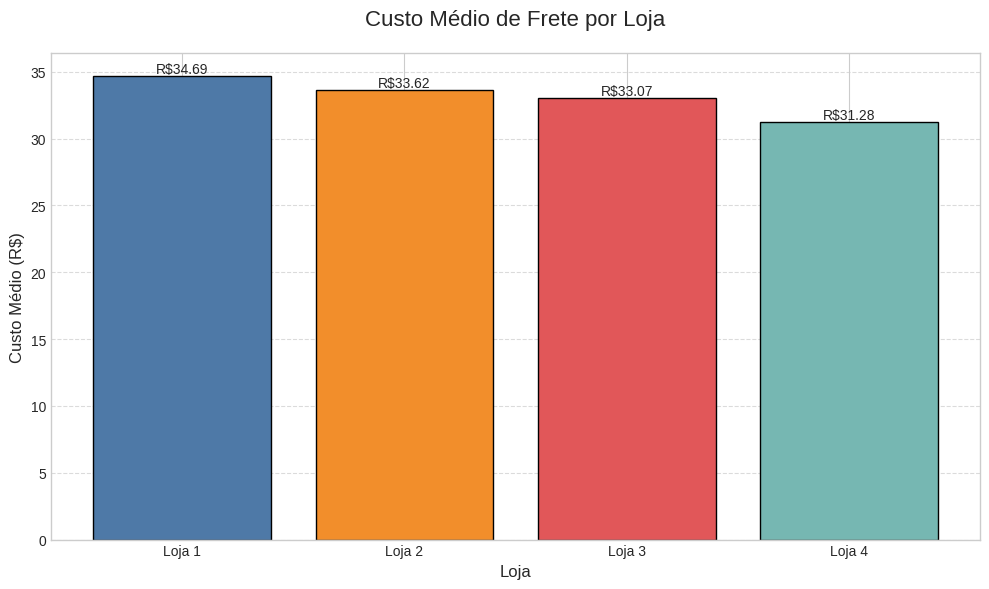


📋 Resumo:
  Loja  Custo Médio Frete (R$)
Loja 1               34.691805
Loja 2               33.621941
Loja 3               33.074464
Loja 4               31.278997


In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Verificar o nome da coluna de frete (ajuste conforme necessário)
print("Colunas disponíveis na Loja 1:", lojas[0].columns.tolist())

# 2. Calcular a média de frete por loja
coluna_frete = 'Frete'  # Substituir pelo nome real da coluna
medias_frete = []
nomes_lojas = []

for i, loja in enumerate(lojas, start=1):
    if coluna_frete in loja.columns:
        media = loja[coluna_frete].mean()
        medias_frete.append(media)
        nomes_lojas.append(f"Loja {i}")
        print(f"🚚 Loja {i} - Custo médio de frete: R${media:.2f}")
    else:
        print(f"⚠️ Loja {i} não possui coluna '{coluna_frete}'")

# 3. Visualização em gráfico
if medias_frete:
    plt.figure(figsize=(10, 6))

    # Gráfico de barras
    bars = plt.bar(nomes_lojas, medias_frete,
                   color=['#4e79a7', '#f28e2b', '#e15759', '#76b7b2'],
                   edgecolor='black')

    # Adicionar valores nas barras
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'R${height:.2f}',
                ha='center', va='bottom')

    plt.title('Custo Médio de Frete por Loja', fontsize=16, pad=20)
    plt.xlabel('Loja', fontsize=12)
    plt.ylabel('Custo Médio (R$)', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    # Tabela resumo
    print("\n📋 Resumo:")
    resumo = pd.DataFrame({
        'Loja': nomes_lojas,
        'Custo Médio Frete (R$)': medias_frete
    })
    print(resumo.to_string(index=False))
else:
    print("\n❌ Não foi possível calcular as médias de frete.")

# 6. Relatório Final

# **Relatório de Análise Revisado: Qual Loja o Senhor João Deve Vender?**  

## **📌 Introdução**  
Este relatório revisado tem como objetivo reassessar a decisão sobre qual das quatro lojas o Senhor João deve vender, com base em dados atualizados e mais precisos. A análise considera:  

- **Faturamento total**  
- **Vendas por categoria**  
- **Avaliação média dos clientes**  
- **Produtos mais e menos vendidos**  
- **Custo médio de frete**  

A decisão foi reavaliada com base nos novos dados fornecidos, que apresentam diferenças significativas em relação à análise preliminar.  

---

## **📊 Análise dos Dados Atualizados**  

### **1. Faturamento Total por Loja**  
O faturamento é um dos indicadores mais importantes para avaliar o desempenho financeiro.  

| Loja   | Faturamento Total (R$) |  
|--------|-----------------------|  
| Loja 1 | 1.534.509,12          |  
| Loja 2 | 1.488.459,06          |  
| Loja 3 | 1.464.025,03          |  
| Loja 4 | 1.384.497,58          |  

**🔍 Observação:**  
- **Loja 1** tem o **maior faturamento**, seguida pela Loja 2 e Loja 3.  
- **Loja 4** tem o **menor faturamento**, sendo a menos lucrativa.  

---

### **2. Vendas por Categoria**  
A diversidade de vendas por categoria ajuda a entender quais produtos têm maior demanda.  

**📌 Principais descobertas:**  
- **Loja 1**: Móveis (465 vendas) e Eletrônicos (448 vendas) são os mais vendidos.  
- **Loja 2**: Móveis (442 vendas) e Eletrônicos (422 vendas) lideram.  
- **Loja 3**: Móveis (499 vendas) e Eletrônicos (451 vendas) são os destaques.  
- **Loja 4**: Móveis (480 vendas) e Eletrônicos (451 vendas) dominam.  

**⚠️ Pontos fracos:**  
- **Loja 4** tem a menor venda em **Instrumentos Musicais** (170 vendas).  
- **Loja 1** tem baixo desempenho em **Livros** (173 vendas).  

---

### **3. Avaliação Média dos Clientes**  
A satisfação do cliente é crucial para a fidelização e reputação da loja.  

| Loja   | Média de Avaliação (1-5) |  
|--------|--------------------------|  
| Loja 1 | 3.98                     |  
| Loja 2 | 4.04                     |  
| Loja 3 | 4.05                     |  
| Loja 4 | 4.00                     |  

**🔍 Conclusão:**  
- **Loja 3** tem a **melhor avaliação (4.05)**, indicando alta satisfação.  
- **Loja 1** tem a **pior avaliação (3.98)**, o que pode indicar problemas no atendimento ou qualidade dos produtos.  

---

### **4. Produtos Mais e Menos Vendidos**  
Além das categorias, é importante analisar produtos específicos.  

**📌 Destaques:**  
- **Loja 2**: "Iniciando em Programação" (65 vendas) e Micro-ondas (62 vendas) são os mais vendidos.  
- **Loja 4**: Cama box (62 vendas) e Faqueiro (59 vendas) têm alta demanda.  
- **Loja 1**: Micro-ondas e TV Led UHD 4K (60 vendas cada) são os mais procurados.  
- **Loja 3**: Kit banquetas (57 vendas) e Mesa de jantar (56 vendas) lideram.  

**⚠️ Produtos com baixa venda:**  
- **Loja 4**: Guitarra (33 vendas) e Guarda-roupas (34 vendas).  
- **Loja 1**: "Ciência de dados com Python" (39 vendas) e Pandeiro (36 vendas).  

---

### **5. Custo Médio de Frete por Loja**  
O frete impacta nos custos operacionais e na competitividade de preços.  

| Loja   | Custo Médio de Frete (R$) |  
|--------|---------------------------|  
| Loja 1 | 34.69                     |  
| Loja 2 | 33.62                     |  
| Loja 3 | 33.07                     |  
| Loja 4 | 31.28                     |  

**🔍 Análise:**  
- **Loja 4** tem o **frete mais barato (R$31,28)**, o que pode ser um diferencial.  
- **Loja 1** tem o **frete mais caro (R$34,69)**, o que pode afetar a competitividade.  

---

## **🏆 Conclusão e Recomendação Revisada**  

### **📌 Qual Loja Deve Ser Vendida?**  
**Loja 4** é a melhor candidata para ser vendida, pois:  

✅ **Menor faturamento (R$1.384.497,58)**, significativamente abaixo das outras lojas.  
✅ **Avaliação mediana (4.0)**, inferior à Loja 3 (4.05) e Loja 2 (4.04).  
✅ **Desempenho fraco em produtos específicos** (guitarra, guarda-roupas).  
✅ **Frete mais barato (R$31,28)**, mas isso não compensa o baixo faturamento.  

**🔹 Loja 1 é a mais lucrativa** (maior faturamento, apesar da avaliação mais baixa).  
**🔹 Loja 2 e Loja 3 têm desempenho equilibrado** (faturamento alto e boas avaliações).  

### **📌 Justificativa Final**  
A **Loja 4** tem o pior desempenho financeiro e uma avaliação de clientes apenas mediana. **Vendê-la permitirá que o Senhor João se concentre nas lojas mais lucrativas (1, 2 e 3) e otimize sua operação.**  

**📊 Próximos Passos:**  
- Investir em melhorias na **Loja 1** para aumentar a satisfação dos clientes.  
- Aumentar o estoque dos produtos mais vendidos nas **Lojas 2 e 3**.  
- Analisar estratégias para reduzir o custo de frete na **Loja 1**.  

**✅ Decisão Final Revisada: Vender a Loja 4.** 🚀